In [1]:
import pandas as pd       # using pandas for data structure 
import nltk               # nlp library
import os                 # import the os module 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [2]:
#download the following resources once           

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/timothyz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/timothyz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stop = stopwords.words('english')
stop = set(stop)        # change list to set significantly increases the processing speed

fn = "LoughranMcDonald_MasterDictionary_2018.csv" # input file                                                                                     fn = 'f:\factiva\PythonCodes\LoughranMcDonald_MasterDictionary_2018.csv' # input file
df_Master = pd.read_csv(fn)
master_list = list(df_Master['Word'])    
master_list = [itr for itr in master_list if not isinstance(itr,float) ]  # drop the floating numbers, leave the strings
master_list = [itr.lower() for itr in master_list] # make all lowercase
master_list = set(master_list) # Also change to set so O(1) hash lookup using set

#read a small dataset in
df = pd.read_pickle("CSRnews.pkl") # Reads byte-like object in as readable format
df_temp = df[:2000]
df1 = df[:200][["an", "title","body"]]
df_temp.to_csv("csrnews_first2000.csv")

In [7]:
df1

,an,title,body
30,BWR0000020041117e0bh004i3,American Express Launches Nationwide Campaign ...,American Express today announced a cause-relat...
1097,NYTFEED020120810e88c004jz,"Two Fewer Cylinders, Not That You’ll Notice","For that reason, the latest fuel economy techn..."
1154,GLOB000020080419e44j00069,This is good: You can be selfish and altruisti...,Communities are benefiting from what analysts ...
2429,DJDN000020090728e4870n44x,=DJ AMAZON OIL ROW: US-Ecuador Ties Influence ...,QUITO (Dow Jones)--Though rooted in the legal ...
2630,DFP0000020080815e48a00002,REVVED UP | WHAT'S HOT AND WHAT'S NOT IN AUTOS,Stalled: Land Rover is last in J.D. Power's re...
...,...,...,...
129996,DJDN000020190223ef2n000ey,1 Fund Avoided the Kraft Heinz Stock Bloodbath...,Some big names have been caught up in the Kraf...
130670,PZON000020180918ee9i0008s,"Sonoco Donates $50,000 to Hurricane Florence R...","Since its founding in 1899, Sonoco has been he..."
131417,ENPNEW0020180503ee53000hq,Ceres Conference Panel Highlights McDonald's S...,"The panel, 'Further, Faster, Together: Why Set..."
131970,DJDN000020200806eg86002b6,Press Release: Vive Crop Protection and Marron...,The first product to come from this joint effo...


In [8]:
#tokenize corpus and remove stop words before the counting
def custom_tokenize(text):
    text = text.lower()
    if not text:
        text = ''
    return word_tokenize(text)

# Helper function for tokenize_df
def filter_func(word):             # Stop being set helps
    return (word in master_list) and (word not in stop) # Keep non-stop words only

def tokenize_df(df):
    column = 'body'
    temp = df[column].str.lower()    # need to turn to lower cases 
    temp = temp.apply(str)            # turn into string variable
    temp = temp.apply(lambda x: x.split()) # split into list of words
    temp_filtered = temp.apply(lambda x: list(filter(filter_func, x))) # filter it using filter() method
        
    # setting values
    df[column + '_nsw'] = temp_filtered
    
    # if we want to convert back to one sentence
    #df[column + '_nsw'] = df[column + '_nsw'].apply(lambda x: ' '.join(x)) 
        
    return None

tokenize_df(df1)

In [9]:
df1

,an,title,body,body_nsw
30,BWR0000020041117e0bh004i3,American Express Launches Nationwide Campaign ...,American Express today announced a cause-relat...,"[express, today, announced, marketing, program..."
1097,NYTFEED020120810e88c004jz,"Two Fewer Cylinders, Not That You’ll Notice","For that reason, the latest fuel economy techn...","[latest, fuel, economy, technologies, introduc..."
1154,GLOB000020080419e44j00069,This is good: You can be selfish and altruisti...,Communities are benefiting from what analysts ...,"[communities, benefiting, analysts, describe, ..."
2429,DJDN000020090728e4870n44x,=DJ AMAZON OIL ROW: US-Ecuador Ties Influence ...,QUITO (Dow Jones)--Though rooted in the legal ...,"[rooted, legal, dispute, chevron, indigenous, ..."
2630,DFP0000020080815e48a00002,REVVED UP | WHAT'S HOT AND WHAT'S NOT IN AUTOS,Stalled: Land Rover is last in J.D. Power's re...,"[land, rover, last, reliability, land, rovers,..."
...,...,...,...,...
129996,DJDN000020190223ef2n000ey,1 Fund Avoided the Kraft Heinz Stock Bloodbath...,Some big names have been caught up in the Kraf...,"[big, names, caught, including, warren, firm, ..."
130670,PZON000020180918ee9i0008s,"Sonoco Donates $50,000 to Hurricane Florence R...","Since its founding in 1899, Sonoco has been he...","[since, founding, headquartered, employs, near..."
131417,ENPNEW0020180503ee53000hq,Ceres Conference Panel Highlights McDonald's S...,"The panel, 'Further, Faster, Together: Why Set...","[setting, science, based, target, new, normal,..."
131970,DJDN000020200806eg86002b6,Press Release: Vive Crop Protection and Marron...,The first product to come from this joint effo...,"[first, product, come, joint, effort, fungicid..."


In [14]:
# Count total number of master words/positive words/negative words

# We get the list of positive/negative words from df_Master
pos_lst = list(df_Master.loc[df_Master['Positive']>0,'Word'])
pos_lst = [itr.lower() for itr in pos_lst]

neg_lst = list(df_Master.loc[df_Master['Negative']>0,'Word'])
neg_lst = [itr.lower() for itr in neg_lst]

def counter(df, pos_lst, neg_lst):
    '''
    returns a dataframe with master/positive/negative words counts appeneded
    '''
    
    # subset to only nsw columns
    df_temp = df.filter(like = '_nsw').copy()
    for column in df_temp.columns:
        # since all words are in master word list, we just count the number of words
        mastercount_val = df_temp[column].apply(lambda x: len(x))
        df_temp[column + '_mastercount'] = mastercount_val
        
        #df_temp[column + '_negcount'] = df_temp[column].apply(lambda x: x.split()) # split the string in the columns
        df_temp[column + '_negcount'] = df_temp[column].apply(
        lambda x: sum(word in neg_lst for word in x)) # lambda function's input is a list of strings, and counts the
                                                      # word if it's in neg_lst
        
        #df_temp[column + '_poscount'] = df_temp[column].apply(lambda x: x.split())
        df_temp[column + '_poscount'] = df_temp[column].apply(
        lambda x: sum(word in pos_lst for word in x))

    # concat bcak with original dataframe
    # Note: dropping body_nsw column because it's duplicate
    df_new = pd.concat([df, df_temp.drop('body_nsw', axis= 1)], axis= 1)
    return df_new

df2 = counter(df1, pos_lst, neg_lst)

In [15]:
df2

,an,title,body,body_nsw,body_nsw_mastercount,body_nsw_negcount,body_nsw_poscount
30,BWR0000020041117e0bh004i3,American Express Launches Nationwide Campaign ...,American Express today announced a cause-relat...,"[express, today, announced, marketing, program...",257,4,5
1097,NYTFEED020120810e88c004jz,"Two Fewer Cylinders, Not That You’ll Notice","For that reason, the latest fuel economy techn...","[latest, fuel, economy, technologies, introduc...",539,11,18
1154,GLOB000020080419e44j00069,This is good: You can be selfish and altruisti...,Communities are benefiting from what analysts ...,"[communities, benefiting, analysts, describe, ...",306,5,12
2429,DJDN000020090728e4870n44x,=DJ AMAZON OIL ROW: US-Ecuador Ties Influence ...,QUITO (Dow Jones)--Though rooted in the legal ...,"[rooted, legal, dispute, chevron, indigenous, ...",485,40,9
2630,DFP0000020080815e48a00002,REVVED UP | WHAT'S HOT AND WHAT'S NOT IN AUTOS,Stalled: Land Rover is last in J.D. Power's re...,"[land, rover, last, reliability, land, rovers,...",20,2,0
...,...,...,...,...,...,...,...
129996,DJDN000020190223ef2n000ey,1 Fund Avoided the Kraft Heinz Stock Bloodbath...,Some big names have been caught up in the Kraf...,"[big, names, caught, including, warren, firm, ...",141,7,1
130670,PZON000020180918ee9i0008s,"Sonoco Donates $50,000 to Hurricane Florence R...","Since its founding in 1899, Sonoco has been he...","[since, founding, headquartered, employs, near...",157,5,5
131417,ENPNEW0020180503ee53000hq,Ceres Conference Panel Highlights McDonald's S...,"The panel, 'Further, Faster, Together: Why Set...","[setting, science, based, target, new, normal,...",145,0,5
131970,DJDN000020200806eg86002b6,Press Release: Vive Crop Protection and Marron...,The first product to come from this joint effo...,"[first, product, come, joint, effort, fungicid...",383,4,25


In [16]:
def top_50_counter(df, col):
    '''
    returns the dictionary of top 50 master words from selected column
    '''
    
    lst = df[col + '_nsw'].tolist() # get column as list
    split_lst = [val for sublist in lst for val in sublist] # flatten the list of list
    
    frq = Counter(split_lst) # counts the frequency
    top_50 = dict(sorted(frq.items(), key = lambda x: x[1], reverse = True)[:50]) # get the top 50
    
    return top_50

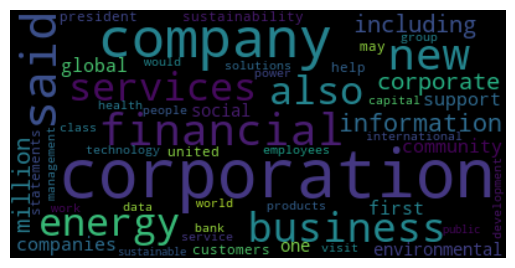

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Join all words together
top_50_words = top_50_counter(df2, 'body')

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=top_50_words)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
top_50_words

{'corporation': 590,
 'company': 398,
 'said': 302,
 'financial': 241,
 'new': 238,
 'business': 208,
 'energy': 200,
 'also': 197,
 'services': 192,
 'information': 190,
 'million': 179,
 'corporate': 171,
 'including': 166,
 'community': 165,
 'global': 158,
 'companies': 156,
 'first': 151,
 'support': 143,
 'environmental': 137,
 'one': 134,
 'social': 134,
 'sustainability': 133,
 'united': 124,
 'customers': 121,
 'statements': 121,
 'president': 119,
 'may': 118,
 'help': 117,
 'technology': 117,
 'health': 112,
 'group': 110,
 'products': 107,
 'employees': 105,
 'solutions': 104,
 'international': 102,
 'data': 100,
 'development': 99,
 'work': 98,
 'capital': 96,
 'bank': 95,
 'visit': 92,
 'world': 91,
 'service': 91,
 'would': 89,
 'management': 88,
 'class': 88,
 'people': 87,
 'power': 86,
 'sustainable': 85,
 'public': 84}